Nama : Mahesa Tirta Panjalu<br>
Kode : PYTN-KS18-012

# Import Library

In [1]:
#Import Library
import numpy as np
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

warnings.filterwarnings("ignore")

pd.set_option("display.max.columns", None)

## Read a dataset

In [26]:
#Membaca dataset csv dan mengubah data ' -  ' menjadi Nan
df = pd.read_csv('./../Dataset/nyc-rolling-sales.csv', na_values=' -  ')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [3]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796.0,2400.0,2006,4,P9,69300.0,2016-10-27 00:00:00


# Data Cleaning

In [4]:
df.shape

(84548, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [6]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [27]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [8]:
df['SALE PRICE'].isnull()

0        False
1         True
2         True
3        False
4        False
         ...  
84543    False
84544    False
84545    False
84546    False
84547    False
Name: SALE PRICE, Length: 84548, dtype: bool

In [12]:
# Mendapatkan Unexpected Missing Values
df['SALE PRICE'][1]

nan

In [28]:
# Mengisi nan dengan mean
df['SALE PRICE'].fillna(round(df['SALE PRICE'].mean(),1), inplace=True)
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,1276456.5,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,1276456.5,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [29]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [30]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796.0,2400.0,2006,4,P9,69300.0,2016-10-27 00:00:00


In [31]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04,8.454800e+04,84548.000000,84548.000000,8.454800e+04
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,3.486182e+04,2.874826e+04,537.344993,0.819341,1.037675e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.348000e+03,1920.000000,1.000000,3.000000e+05
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,3.200000e+03,2.520000e+03,1940.000000,2.000000,6.700000e+05
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,2.000000,1.276456e+06
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [32]:
#Mengubah tipe kolom SALE DATE menjadi date
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      84548 non-null  int64         
 1   BOROUGH                         84548 non-null  int64         
 2   NEIGHBORHOOD                    84548 non-null  object        
 3   BUILDING CLASS CATEGORY         84548 non-null  object        
 4   TAX CLASS AT PRESENT            84548 non-null  object        
 5   BLOCK                           84548 non-null  int64         
 6   LOT                             84548 non-null  int64         
 7   EASE-MENT                       84548 non-null  object        
 8   BUILDING CLASS AT PRESENT       84548 non-null  object        
 9   ADDRESS                         84548 non-null  object        
 10  APARTMENT NUMBER                84548 non-null  object        
 11  ZI

In [34]:
#Merubah data kolom borough
borough_name = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}
df['BOROUGH'] = df['BOROUGH'].replace(borough_name)
df['BOROUGH']

0            Manhattan
1            Manhattan
2            Manhattan
3            Manhattan
4            Manhattan
             ...      
84543    Staten Island
84544    Staten Island
84545    Staten Island
84546    Staten Island
84547    Staten Island
Name: BOROUGH, Length: 84548, dtype: object

In [35]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,1276456.5,2016-12-14
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,1276456.5,2016-12-09
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [36]:
# Menghapus Kolom Unnamed: 0, APARTMENT NUMBER dan EASE-MENT
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('APARTMENT NUMBER', axis=1, inplace=True)
df.drop('EASE-MENT', axis=1, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1276456.5,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1276456.5,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


# QUESTION

**QUESTION:** Is there a significant difference in the sale prices of properties built before the year 2000 (1900-2000) and those built from 2001 onwards in New York City?

Null Hypothesis (H0):μ1 = μ2 <br>

Alternative Hypothesis (H1): μ1 ≠ μ2

In [37]:
#Menslicing data menjadi 2 bagian yaitu sebelum tahun 2000 dan setelah tahun 2000
sale_prices_20s = df[df['YEAR BUILT'] <= 2000]['SALE PRICE']
sale_prices_21s = df[df['YEAR BUILT'] > 2000]['SALE PRICE']
(sale_prices_20s, sale_prices_21s)

(0        6625000.0
 1        1276456.5
 2        1276456.5
 3        3936272.0
 4        8000000.0
            ...    
 84541     648000.0
 84542    1276456.5
 84543     450000.0
 84544     550000.0
 84545     460000.0
 Name: SALE PRICE, Length: 72830, dtype: float64,
 11       10350000.0
 73       28000000.0
 88        1276456.5
 89        1276456.5
 90        1276456.5
             ...    
 84527      580000.0
 84528      550000.0
 84529      545000.0
 84546    11693337.0
 84547       69300.0
 Name: SALE PRICE, Length: 11718, dtype: float64)

In [38]:
t_stat, p_value = stats.ttest_ind(sale_prices_20s, sale_prices_21s, equal_var=False)
if p_value < 0.05:
    print("There is a significant difference in sale prices between properties built before 2000 and those built from 2001 onwards.")
else:
    print("There is no significant difference in sale prices between properties built before 2000 and those built from 2001 onwards.")

There is a significant difference in sale prices between properties built before 2000 and those built from 2001 onwards.


In [39]:
p_value

1.55497684405251e-11

**KESIMPULAN:** Tidak ada perbedaan yang signifikan antara properti yang dibangun pada tahun sebelum 2000 maupun setelah 2000

**QUESTION:** Is there a significant difference in the number of units sold based on the top 3 building categories in New York City?
    <br><br>
Null Hypothesis (H0):
The mean number of units sold is the same for all building categories.
<br>
Alternative Hypothesis (H1):
The mean number of units sold is different for at least one building category.

In [40]:
#Menggroup data berdasarkan BUILDING CLASS CATEGORY dengan jumlah TOTAL UNITS
df_category = df.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].sum()
df_category.head()

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                        18648
02 TWO FAMILY DWELLINGS                        32451
03 THREE FAMILY DWELLINGS                      13137
04 TAX CLASS 1 CONDOS                           1630
05 TAX CLASS 1 VACANT LAND                       245
Name: TOTAL UNITS, dtype: int64

In [41]:
# Mengurutkan berdasatkan total unit terbanyak
df_category.sort_values(ascending=False)

BUILDING CLASS CATEGORY
07 RENTALS - WALKUP APARTMENTS                  39989
02 TWO FAMILY DWELLINGS                         32451
08 RENTALS - ELEVATOR APARTMENTS                31179
01 ONE FAMILY DWELLINGS                         18648
03 THREE FAMILY DWELLINGS                       13137
10 COOPS - ELEVATOR APARTMENTS                  12677
13 CONDOS - ELEVATOR APARTMENTS                 12483
14 RENTALS - 4-10 UNIT                           3587
22 STORE BUILDINGS                               2988
26 OTHER HOTELS                                  2972
11A CONDO-RENTALS                                2605
33 EDUCATIONAL FACILITIES                        2342
21 OFFICE BUILDINGS                              2305
04 TAX CLASS 1 CONDOS                            1630
44 CONDO PARKING                                 1346
25 LUXURY HOTELS                                 1287
15 CONDOS - 2-10 UNIT RESIDENTIAL                1223
09 COOPS - WALKUP APARTMENTS                     1202
12 C

Mengetahui3 kategori properti dengan unit terbanyak

In [42]:
# Kelebihan spasi
df['BUILDING CLASS CATEGORY'][0]

'07 RENTALS - WALKUP APARTMENTS             '

In [43]:
# Menghapus data dengan spasi yang berlebihan
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.strip()
df['BUILDING CLASS CATEGORY'][0]

'07 RENTALS - WALKUP APARTMENTS'

In [44]:
#Menslicing data bersasarkan 3 kategori yang memiliki unit terbanyak
df_category1 = df[df['BUILDING CLASS CATEGORY'] == '07 RENTALS - WALKUP APARTMENTS']['TOTAL UNITS']
df_category2 = df[df['BUILDING CLASS CATEGORY'] == '02 TWO FAMILY DWELLINGS']['TOTAL UNITS']
df_category3 = df[df['BUILDING CLASS CATEGORY'] == '08 RENTALS - ELEVATOR APARTMENTS']['TOTAL UNITS']
(df_category1, df_category2, df_category3)

(0         5
 1        31
 2        17
 3        10
 4         6
          ..
 83861     4
 83862     4
 83863     4
 83864     4
 84170     5
 Name: TOTAL UNITS, Length: 3466, dtype: int64,
 210      2
 211      2
 212      3
 1791     3
 1792     3
         ..
 84541    2
 84542    2
 84543    2
 84544    2
 84545    2
 Name: TOTAL UNITS, Length: 15828, dtype: int64,
 8        15
 9        24
 10       34
 11       10
 234       7
          ..
 74666    60
 74667    62
 75869    30
 75870    47
 75871    50
 Name: TOTAL UNITS, Length: 382, dtype: int64)

In [45]:
#melakukan uji f_oneway
f_statistic, p_value = stats.f_oneway(df_category1, df_category2, df_category3)
p_value

0.0

In [46]:
#cek hasil p_value untuk mendapatkan kesimpulan
if p_value < 0.05:
    print("There is a significant difference in the number of units sold based on building category.")
else:
    print("There is no significant difference in the number of units sold among building categories.")

There is a significant difference in the number of units sold based on building category.


**KESIMPULAN:** Dari analisa di atas mendapatkan 3 kategori dengan total unit terbanyak yaitu 07 RENTALS - WALKUP APARTMENTS, 02 TWO FAMILY DWELLINGS dan 08 RENTALS - ELEVATOR APARTMENTS serta terdapat perbedaan total unit yang signifikan antara 3 kategori tersebut

**QUESTION:** Is the average of the year of construction greater than or equal to the year 1900?<br><br>
Null Hypothesis (H0): μ <= 1900.
<br>
Alternative Hypothesis (H1): μ > 1900.

In [47]:
#Menghitung mean, standar deviasi dan panjang data
yb_mean = df['YEAR BUILT'].mean()
yb_std = df['YEAR BUILT'].std()
n = len(df['YEAR BUILT'])
mu = 1900

In [48]:
print("rata-rata : ",yb_mean)
print("standar deviasi :", yb_std)
print("banyaknya : ",n)

rata-rata :  1789.322976297488
standar deviasi : 537.3449934335748
banyaknya :  84548


In [49]:
#Menghitung T Statistics
T = (yb_mean - mu)/(yb_std/np.sqrt(n))
print(T)

-59.8902235618328


In [50]:
#cek hasil p_value untuk mendapatkan kesimpulan
alpha = 0.05
T_alfa_db = stats.t.ppf(1-alpha,n-1)
print('critical value',T_alfa_db)

critical value 1.6448716498966447


T statistics is greater than the critical value(reject Ho)

**KESIMPULAN:** Karena 59 jauh lebih besar dari 1.64, kita memiliki bukti yang cukup untuk menolak hipotesis nol (H0) yang menyatakan bahwa rata-rata tahun konstruksi kurang dari atau sama dengan 1900. Dengan demikian, kita dapat menerima hipotesis alternatif (H1) yang menyatakan bahwa rata-rata tahun konstruksi lebih besar dari 1900.

**QUESTION:** Does the 95% confidence interval of the average property sale prices in Manhattan include $1.500.000?

In [51]:
#Menslicing data berdasarkan daerah manhattan
df_manhattan = df[df['BOROUGH'] =='Manhattan']
df_manhattan.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1276456.5,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1276456.5,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [52]:
#Menghitung Mean
mean_price_mnthn = df_manhattan['SALE PRICE'].mean()
mean_price_mnthn

2902476.5478258496

In [53]:
#Mengitung panjang data
n_samples_mnthn = len(df_manhattan)
n_samples_mnthn

18306

In [54]:
#Menghitung standar deviasi
std_price_mnthn = df_manhattan['SALE PRICE'].std()
std_price_mnthn

21418111.934754226

In [55]:
#Melakukan Uji interval
confidence_interval = stats.t.interval(0.95, n_samples_mnthn - 1, loc=mean_price_mnthn, scale=std_price_mnthn / (n_samples_mnthn ** 0.5))
confidence_interval

(2592191.2033357034, 3212761.892315996)

In [80]:
#cek hasil CI untuk mendapatkan kesimpulan
if confidence_interval[0] <= 1500000 <= confidence_interval[1]:
    print("Interval kepercayaan 95% dari harga penjualan rata-rata properti di Manhattan mencakup $1.500.000")
else:
    print("Interval kepercayaan 95% dari harga penjualan rata-rata properti di Manhattan tidak mencakup $1.500.000")

Interval kepercayaan 95% dari harga penjualan rata-rata properti di Manhattan tidak mencakup $1.500.000


**KESIMPULAN:** Confidence interval 95% dari harga penjualan rata-rata properti di daerah Manhattan tidak mencakup `$1.500.000` karena confidence intervalnya dimulai dari `$2.592.191` hingga `$3.212.761`

**QUESTION:** Does the distribution of property sale prices follow a normal distribution?

In [57]:
#Menslicing berdasarkan harga jual dan membuat index baru
sale_prices = df['SALE PRICE'].reset_index()
sale_prices.drop('index', axis=1, inplace=True)
sale_prices

,SALE PRICE
0,6625000.0
1,1276456.5
2,1276456.5
3,3936272.0
4,8000000.0
...,...
84543,450000.0
84544,550000.0
84545,460000.0
84546,11693337.0


In [58]:
#Menghitung mean, standar deviasi dan median
mean_price = sale_prices.mean()
median_price = sale_prices.median()
std_deviation = sale_prices.std()

Skewness :  136.3933010356837


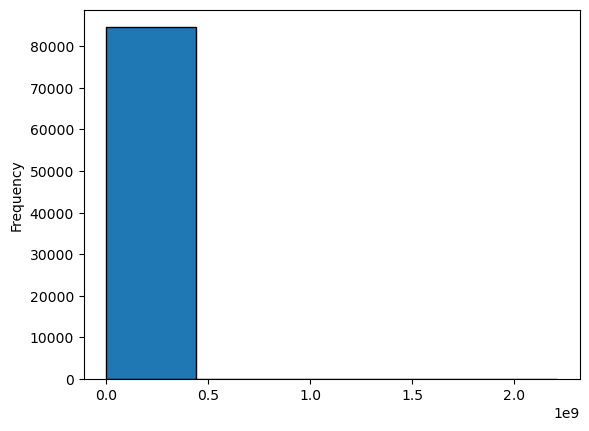

In [86]:
sale_prices['SALE PRICE'].plot(kind='hist', bins=5, edgecolor='black')
print('Skewness : ', sale_prices['SALE PRICE'].skew())

In [60]:
#Melakukan Uji shapiro
stat, p = stats.shapiro(sale_prices)
(stat, p)

(0.036239564418792725, 0.0)

In [61]:
#cek hasil p_value untuk mendapatkan kesimpulan
alpha = 0.05
if p > alpha:
    print("Distribusi harga penjualan properti mengikuti distribusi normal")
else:
    print("Distribusi harga penjualan properti tidak mengikuti distribusi normal")

Distribusi harga penjualan properti tidak mengikuti distribusi normal


**KESIMPULAN:** Harga penjualan tidak mengikuti distribusi normal

**QUESTION:** Hitunglah modus pada tahun pembuatan properti, Median, varians  dan range dari harga jual properti

In [62]:
#Menslicing data berdasarkan tahun buat properti
df_years_built = df['YEAR BUILT']
df_years_built

0        1900
1        1900
2        1900
3        1913
4        1900
         ... 
84543    1998
84544    1998
84545    1925
84546    2001
84547    2006
Name: YEAR BUILT, Length: 84548, dtype: int64

In [63]:
#Menhitung modus
modus = stats.mode(df_years_built)
print(f'Properti paling banyak di bangun pada tahun : {modus.mode[0]}')

Properti paling banyak di bangun pada tahun : 0


In [64]:
sale_prices

,SALE PRICE
0,6625000.0
1,1276456.5
2,1276456.5
3,3936272.0
4,8000000.0
...,...
84543,450000.0
84544,550000.0
84545,460000.0
84546,11693337.0


In [65]:
#Menghitung median, range dan varians
median_harga = sale_prices.median()
range_harga = np.ptp(sale_prices)
varians_harga = np.var(sale_prices)

In [66]:
print(f"Titik tengah harga: {median_harga[0]}")
print(f"Range Harga : {range_harga[0]}")
print(f"Varians harga : {varians_harga[0]}")

Titik tengah harga: 670000.0
Range Harga : 2210000000.0
Varians harga : 107675738605333.78


**KESIMPULAN:** Properti yang dibuat pada tahun sebelum dan sesudah 2000 tidak memiliki perbedaan signifikan pada harga jualnya tetapi harga jual berbeda secara signifikan berdasarkan kategori properti dan distribusi pada harga jual bukan termasuk distribusi normal